In [1]:
#imports
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('ggplot')

from matplotlib.colors import ListedColormap

In [2]:
Cleaned_data = pd.read_csv("CleanData.csv")
walc = Cleaned_data['Walc']
dalc = Cleaned_data['Dalc']

In [3]:
#import survey data
Survey_data = pd.read_csv('SurveyData.csv')

In [4]:
#concatenate two sets of data
num_data = ['age', 'school_num', 'sex_num', 'address_num', 'famsize_num', 'reason_num', 'traveltime', 
            'studytime', 'failures', 'famsup_num', 'internet_num', 'romantic_num', 'freetime', 'Dalc', 
            'Walc', 'health', 'paid_num']

Survey_data_num = Survey_data[num_data]
Cleaned_data_num = Cleaned_data[num_data]

num_data_df = pd.concat([Survey_data_num, Cleaned_data_num])
walc_all = num_data_df['Walc']
dalc_all = num_data_df['Dalc']
alc_avg = (num_data_df['Walc'] + num_data_df['Dalc'])/2
school_all = num_data_df['school_num']

In [5]:
num_data_df.describe()

,age,school_num,sex_num,address_num,famsize_num,reason_num,traveltime,studytime,failures,famsup_num,internet_num,romantic_num,freetime,Dalc,Walc,health,paid_num
count,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.00000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000
mean,17.373541,0.434501,0.442283,0.282750,0.673152,1.424125,1.587549,2.02594,0.368353,0.417639,0.217899,0.612192,3.136187,1.505837,2.291829,3.596628,0.933852
std,2.866379,0.610984,0.496980,0.450628,0.469366,0.984498,0.760076,0.90846,0.780765,0.493490,0.413086,0.487567,1.085142,0.913623,1.293007,1.402017,0.248702
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,3.000000,1.000000
50%,17.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.00000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,2.000000,4.000000,1.000000
75%,18.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.00000,0.000000,1.000000,0.000000,1.000000,4.000000,2.000000,3.000000,5.000000,1.000000
max,47.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.00000,4.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [6]:
num_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771 entries, 0 to 721
Data columns (total 17 columns):
age             771 non-null float64
school_num      771 non-null int64
sex_num         771 non-null int64
address_num     771 non-null int64
famsize_num     771 non-null int64
reason_num      771 non-null int64
traveltime      771 non-null float64
studytime       771 non-null float64
failures        771 non-null float64
famsup_num      771 non-null int64
internet_num    771 non-null int64
romantic_num    771 non-null int64
freetime        771 non-null float64
Dalc            771 non-null float64
Walc            771 non-null float64
health          771 non-null float64
paid_num        771 non-null int64
dtypes: float64(8), int64(9)
memory usage: 108.4 KB


In [7]:
from sklearn.decomposition import PCA 

## PCA plot without alcohol consumption labels

In [8]:
# Only use columns with numbers involved:
chosen_columns = ['Fedu', 'G1', 'G2', 'G3', 'Medu','absences', 'age', 
                  'failures', 'famrel', 'freetime', 'goout', 'health', 'math', 
                  'port', 'studytime', 'traveltime', 'school_num', 'sex_num','address_num', 
                  'famsize_num', 'Pstatus_num', 'Mjob_num', 'Fjob_num','reason_num', 
                  'guardian_num', 'schoolsup_num', 'famsup_num', 'activities_num','nursery_num', 
                  'higher_num', 'internet_num', 'romantic_num', 'paid_num']

Cleaned_data_subset = Cleaned_data[chosen_columns]

In [9]:
#building PCA models
pca_model = PCA()
X_PCA = pca_model.fit_transform(Cleaned_data_subset)

In [10]:
pca_model.explained_variance_ratio_

array([  5.68058622e-01,   2.15161860e-01,   3.34022863e-02,
         2.42039153e-02,   2.05323923e-02,   1.77053936e-02,
         1.37024493e-02,   1.21234904e-02,   1.10681675e-02,
         9.93308732e-03,   9.51262595e-03,   8.72798324e-03,
         7.22943654e-03,   6.14298526e-03,   5.38827417e-03,
         4.48444464e-03,   3.94384194e-03,   3.64583169e-03,
         2.96946294e-03,   2.88929839e-03,   2.58636224e-03,
         2.33781414e-03,   2.28280953e-03,   2.01956419e-03,
         1.71796328e-03,   1.65428883e-03,   1.61290804e-03,
         1.25532040e-03,   1.00487938e-03,   9.41053105e-04,
         8.57678400e-04,   6.34378801e-04,   2.69131496e-04])

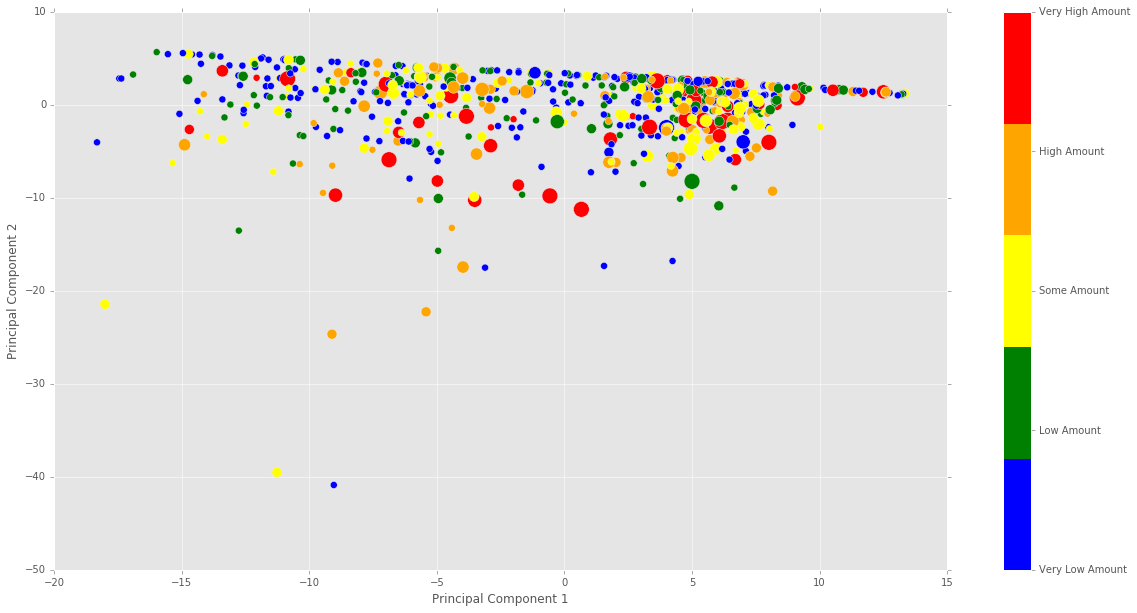

In [11]:
# PCA analysis 

colors = ListedColormap(['blue','green','yellow','orange','red'])

ax = plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=walc, s=dalc*50, cmap=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar = plt.colorbar(ticks = [1,2,3,4,5])
cbar.ax.set_yticklabels(['Very Low Amount', 'Low Amount', 'Some Amount', 'High Amount', 'Very High Amount']) 
plt.show()

## PCA plot with Alcohol consumption labels

In [12]:
# Only use columns with numbers involved:
chosen_columns = ['Fedu', 'G1', 'G2', 'G3', 'Medu','absences', 'age', 'Dalc', 'Walc', 
                  'failures', 'famrel', 'freetime', 'goout', 'health', 'math', 
                  'port', 'studytime', 'traveltime', 'school_num', 'sex_num','address_num', 
                  'famsize_num', 'Pstatus_num', 'Mjob_num', 'Fjob_num','reason_num', 
                  'guardian_num', 'schoolsup_num', 'famsup_num', 'activities_num','nursery_num', 
                  'higher_num', 'internet_num', 'romantic_num', 'paid_num']

Cleaned_data = Cleaned_data[chosen_columns]

In [13]:
#building PCA models
pca_model = PCA()
X_PCA = pca_model.fit_transform(Cleaned_data)

In [14]:
pca_model.explained_variance_ratio_

array([  5.52250507e-01,   2.09806298e-01,   3.35917269e-02,
         2.89081891e-02,   2.24225911e-02,   1.75332754e-02,
         1.56547627e-02,   1.31861900e-02,   1.17538483e-02,
         1.07523248e-02,   9.35768204e-03,   8.59069000e-03,
         8.38425922e-03,   6.76654308e-03,   5.84492756e-03,
         5.20323882e-03,   4.73078546e-03,   4.18834701e-03,
         3.80658450e-03,   3.29909622e-03,   2.81619846e-03,
         2.74296242e-03,   2.49482055e-03,   2.26187723e-03,
         2.21526767e-03,   1.79279657e-03,   1.66754665e-03,
         1.60485528e-03,   1.56599453e-03,   1.21808704e-03,
         9.75133160e-04,   9.10047675e-04,   8.32007595e-04,
         6.10723694e-04,   2.59814463e-04])

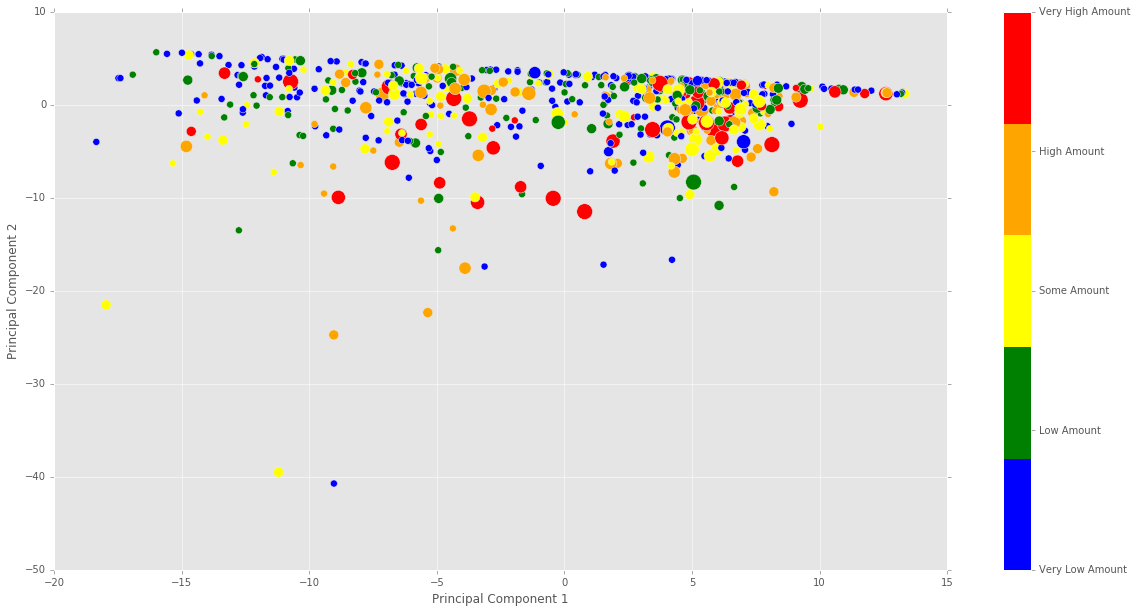

In [15]:
# PCA analysis 

colors = ListedColormap(['blue','green','yellow','orange','red'])

ax = plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=walc, s=dalc*50, cmap=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar = plt.colorbar(ticks = [1,2,3,4,5])
cbar.ax.set_yticklabels(['Very Low Amount', 'Low Amount', 'Some Amount', 'High Amount', 'Very High Amount']) 
plt.show()

## PCA Plot with survey data, no alcohol consumption labels

In [16]:
PCA_cols = ['age', 'school_num', 'sex_num', 'address_num', 'famsize_num', 'reason_num', 'traveltime',
            'studytime', 'failures', 'famsup_num', 'internet_num', 'romantic_num', 'freetime', 'health', 'paid_num']

combined_data_PCA = num_data_df[PCA_cols]

In [17]:
#building PCA models
pca_model_survey = PCA()
survey_PCA = pca_model_survey.fit_transform(combined_data_PCA)

In [18]:
pca_model_survey.explained_variance_ratio_

array([ 0.53137355,  0.1236184 ,  0.07545502,  0.06381176,  0.04494007,
        0.03652985,  0.03154436,  0.01709119,  0.01577349,  0.01406131,
        0.01272346,  0.01115221,  0.00972798,  0.00857484,  0.00362251])

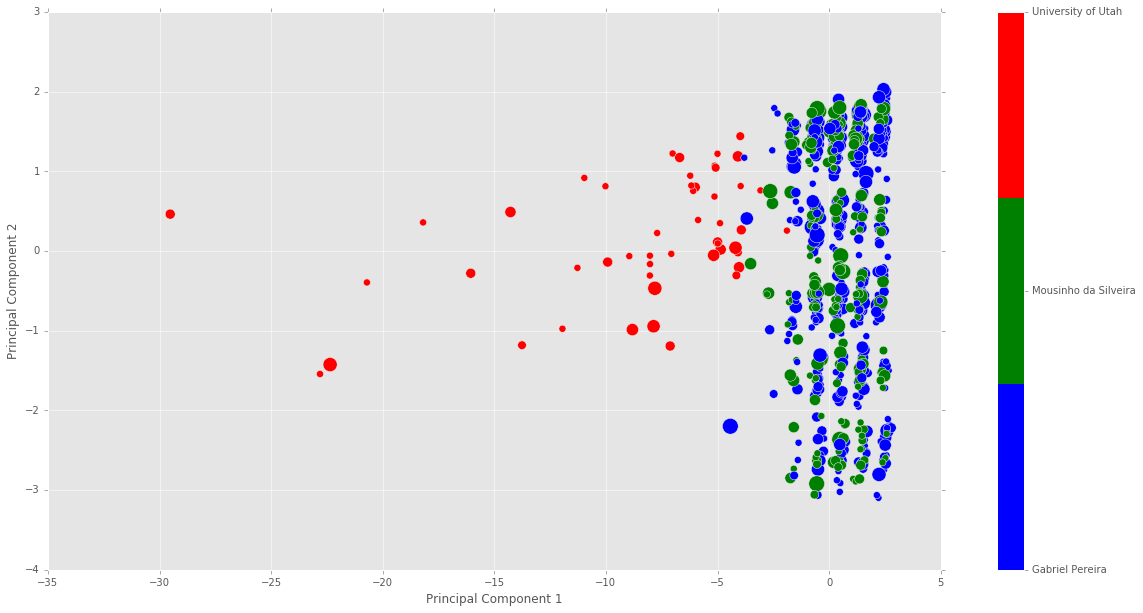

In [19]:
# PCA analysis 

# components
components = pca_model_survey.components_

colors = ListedColormap(['blue','green','red'])

ax = plt.scatter(survey_PCA[:, 0], survey_PCA[:, 1], c=school_all, s=alc_avg*50, cmap=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar = plt.colorbar(ticks = [0, 1, 2])
cbar.ax.set_yticklabels(['Gabriel Pereira', 'Mousinho da Silveira', 'University of Utah']) 
    
plt.show()

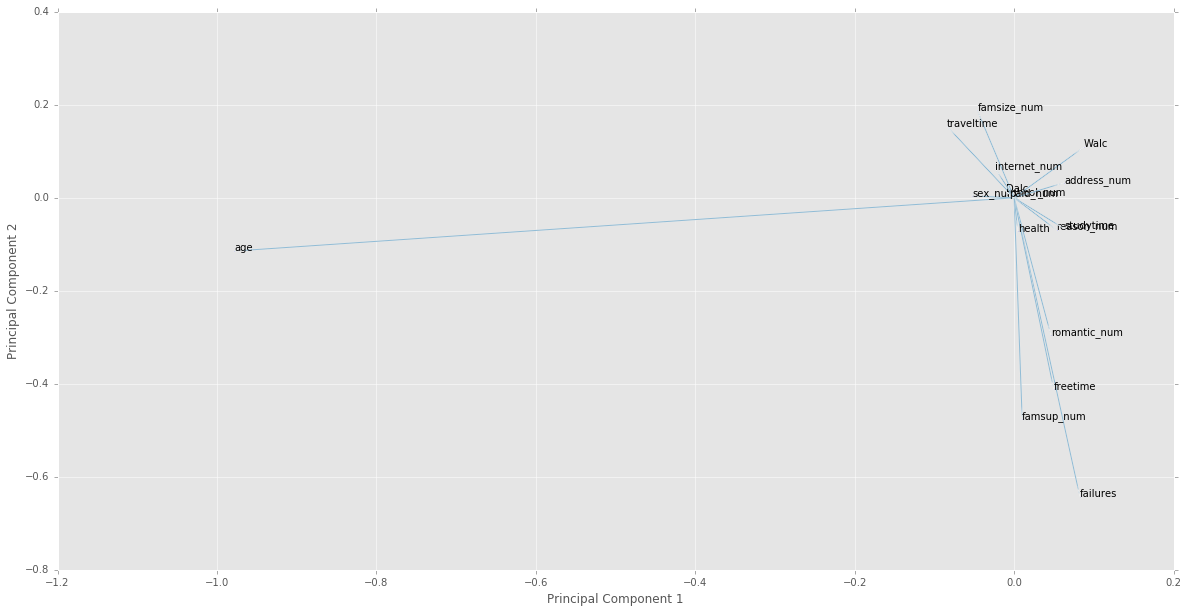

In [26]:
#plot components

ax = plt.scatter(components[:,0],components[:,1], s=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
    
for i in range(0,len(components)):
    plt.annotate(s='', xytext=(0,0), xy=(components[i][0],components[i][1]), arrowprops={'width':1, 'headwidth':1})
    plt.annotate(s=PCA_cols[i], xy=(0,0), xytext=(components[i][0],components[i][1]))

plt.show()

## PCA Plot with survey data and alcohol consumption labels

In [21]:
PCA_cols = ['age', 'school_num', 'sex_num', 'address_num', 'famsize_num', 'reason_num', 'traveltime', 'Walc', 'Dalc',
            'studytime', 'failures', 'famsup_num', 'internet_num', 'romantic_num', 'freetime', 'health', 'paid_num']

combined_data_PCA = num_data_df[PCA_cols]

In [22]:
#building PCA models
pca_model_survey = PCA()
survey_PCA = pca_model_survey.fit_transform(combined_data_PCA)

In [23]:
pca_model_survey.explained_variance_ratio_

array([ 0.45984025,  0.12900987,  0.09975775,  0.05970804,  0.05513206,
        0.03681798,  0.03168778,  0.02712029,  0.02190731,  0.01412701,
        0.0136271 ,  0.01215595,  0.01090309,  0.00934735,  0.00835115,
        0.00740788,  0.00309918])

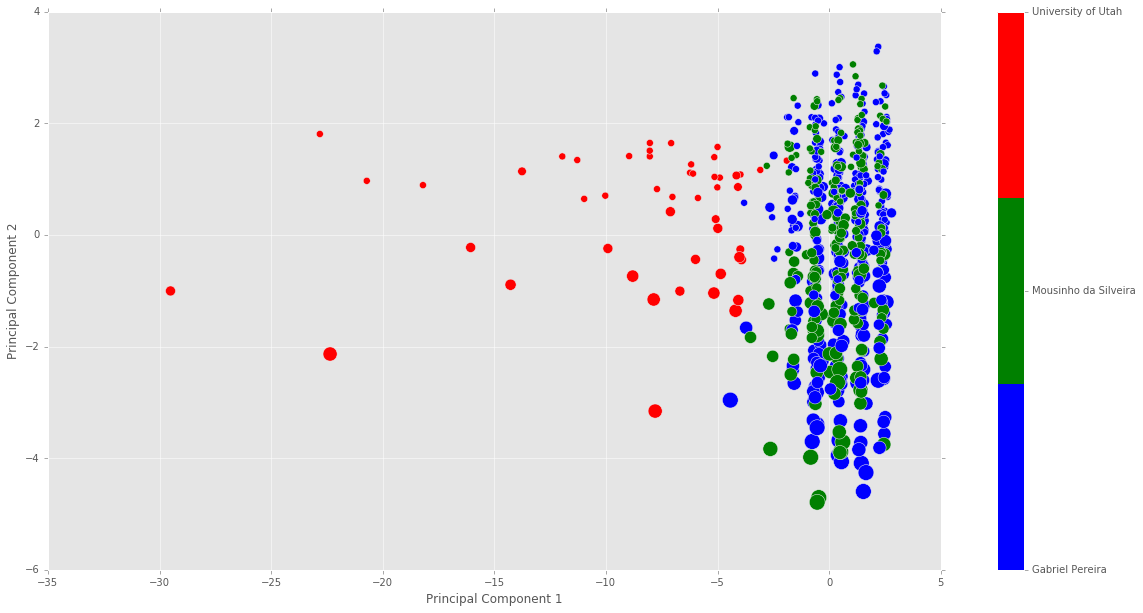

In [24]:
# PCA analysis 

# components
components = pca_model_survey.components_

colors = ListedColormap(['blue','green','red'])

ax = plt.scatter(survey_PCA[:, 0], survey_PCA[:, 1], c=school_all, s=alc_avg*50, cmap=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar = plt.colorbar(ticks = [0, 1, 2])
cbar.ax.set_yticklabels(['Gabriel Pereira', 'Mousinho da Silveira', 'University of Utah']) 
    
plt.show()

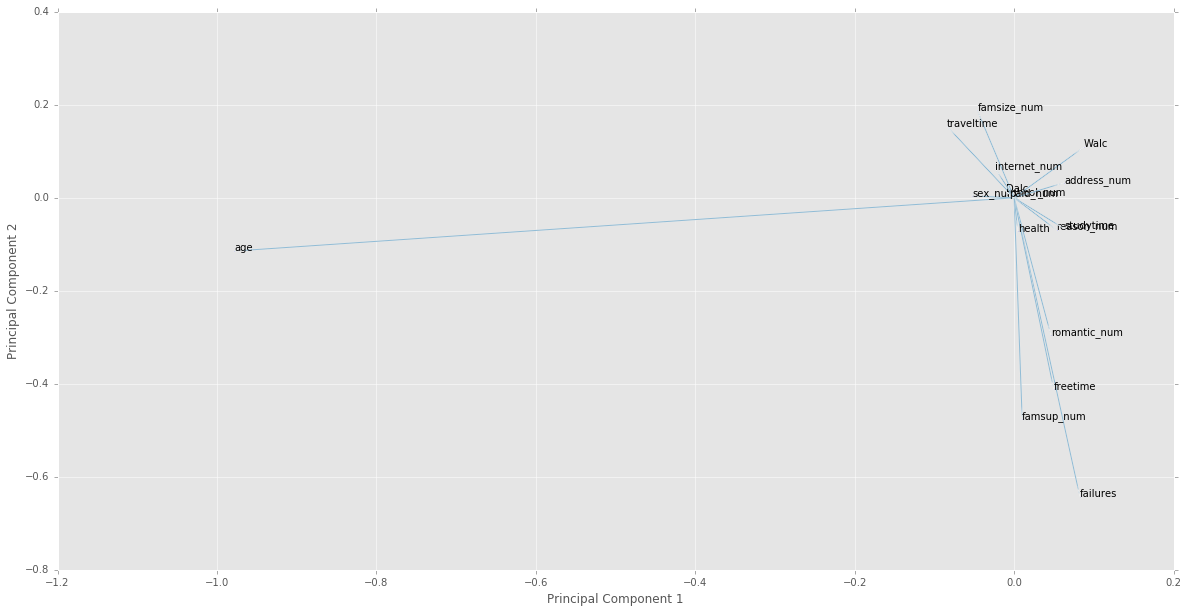

In [27]:
#plot components

ax = plt.scatter(components[:,0],components[:,1], s=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
    
for i in range(0,len(components)):
    plt.annotate(s='', xytext=(0,0), xy=(components[i][0],components[i][1]), arrowprops={'width':1, 'headwidth':1})
    plt.annotate(s=PCA_cols[i], xy=(0,0), xytext=(components[i][0],components[i][1]))

plt.show()